In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 145118 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [0]:
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_path = '/content/drive/My Drive/Colab Notebooks/03-stock-samsung/data'
model_path = '/content/drive/My Drive/Colab Notebooks/03-stock-samsung/model'

In [0]:
df_price = pd.read_csv(os.path.join(data_path, '01-삼성전자-주가.csv'), encoding='utf8')
df_buyer = pd.read_csv(os.path.join(data_path, '02-삼성전자-매매동향.csv'), encoding='utf8')

In [8]:
df_price.describe()

,일자,시가,고가,저가,종가,거래량
count,9.288000e+03,9288.000000,9288.000000,9288.000000,9288.000000,9.288000e+03
mean,2.001347e+07,11108.556417,11228.754522,10986.106481,11108.235465,1.645823e+07
std,1.015376e+05,13792.646300,13920.105135,13658.809496,13790.922497,1.701535e+07
min,1.985010e+07,116.000000,116.000000,115.000000,116.000000,0.000000e+00
25%,1.992121e+07,624.000000,632.000000,620.000000,623.000000,3.833986e+06
50%,2.001032e+07,5045.000000,5190.000000,4955.000000,5075.000000,1.199608e+07
75%,2.010080e+07,15920.000000,16050.000000,15740.000000,15920.000000,2.284080e+07
max,2.020011e+07,57500.000000,57520.000000,56760.000000,57220.000000,3.266220e+08


## 날짜형 컬럼으로 변환

format 지정을 반드시 해줘야만 정상적으로 동작함

In [9]:
pd.to_datetime(df_price['일자'], format='%Y%m%d')

0      2020-01-07
1      2020-01-06
2      2020-01-03
3      2020-01-02
4      2019-12-30
          ...    
9283   1985-01-09
9284   1985-01-08
9285   1985-01-07
9286   1985-01-05
9287   1985-01-04
Name: 일자, Length: 9288, dtype: datetime64[ns]

In [0]:
df_price['일자'] = pd.to_datetime(df_price['일자'], format='%Y%m%d')

In [11]:
df_price['일자'].head()

0   2020-01-07
1   2020-01-06
2   2020-01-03
3   2020-01-02
4   2019-12-30
Name: 일자, dtype: datetime64[ns]

In [12]:
df_price.head()

,일자,시가,고가,저가,종가,거래량
0,2020-01-07,55700,56400,55600,55800,9893846
1,2020-01-06,54900,55600,54600,55500,10278951
2,2020-01-03,56000,56600,54900,55500,15422255
3,2020-01-02,55500,56000,55000,55200,12993228
4,2019-12-30,56200,56600,55700,55800,8356767


In [0]:
df_price['연도'] =df_price['일자'].dt.year
df_price['월'] =df_price['일자'].dt.month
df_price['일'] =df_price['일자'].dt.day

In [14]:
df_price.head()

,일자,시가,고가,저가,종가,거래량,연도,월,일
0,2020-01-07,55700,56400,55600,55800,9893846,2020,1,7
1,2020-01-06,54900,55600,54600,55500,10278951,2020,1,6
2,2020-01-03,56000,56600,54900,55500,15422255,2020,1,3
3,2020-01-02,55500,56000,55000,55200,12993228,2020,1,2
4,2019-12-30,56200,56600,55700,55800,8356767,2019,12,30


## 시각화

In [0]:
df = df_price.loc[df_price['연도']>=1990]

Text(0, 0.5, 'price')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


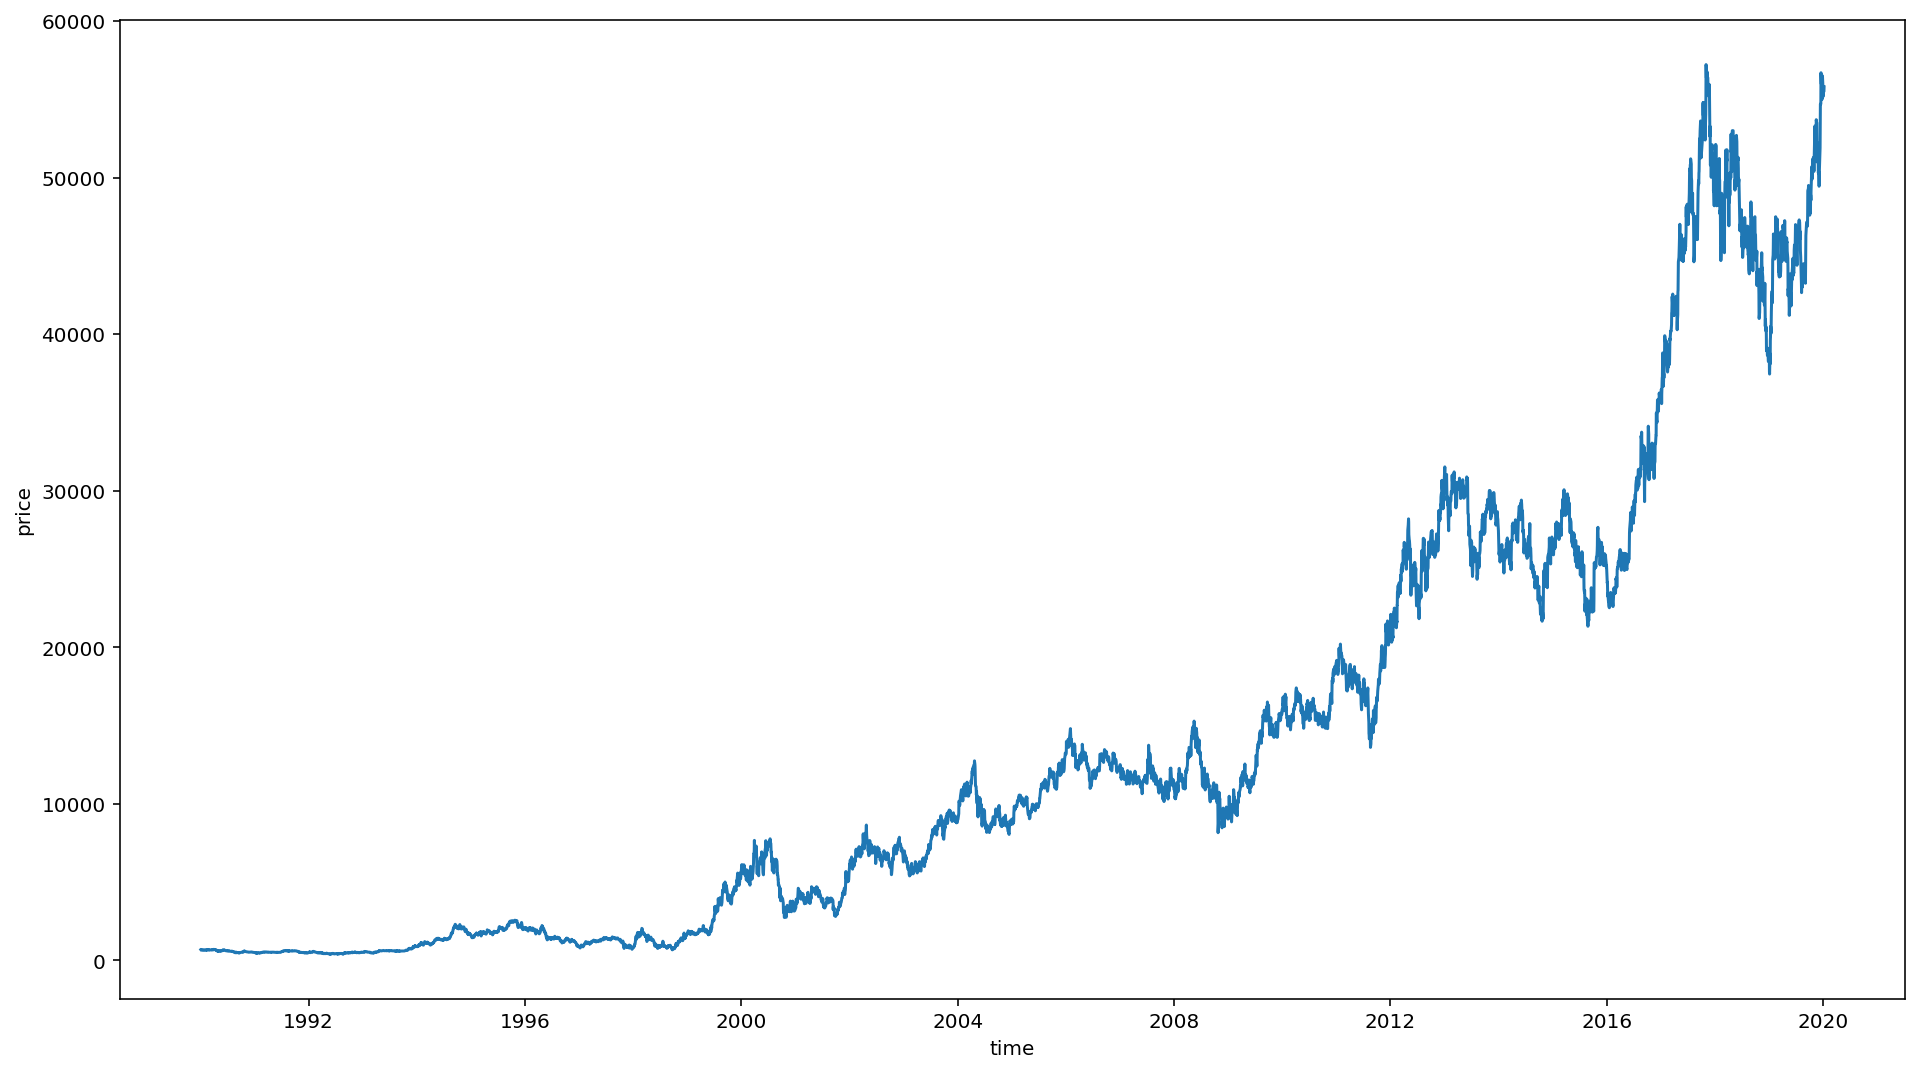

In [16]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['종가'], x=df['일자'])
plt.xlabel('time')
plt.ylabel('price')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


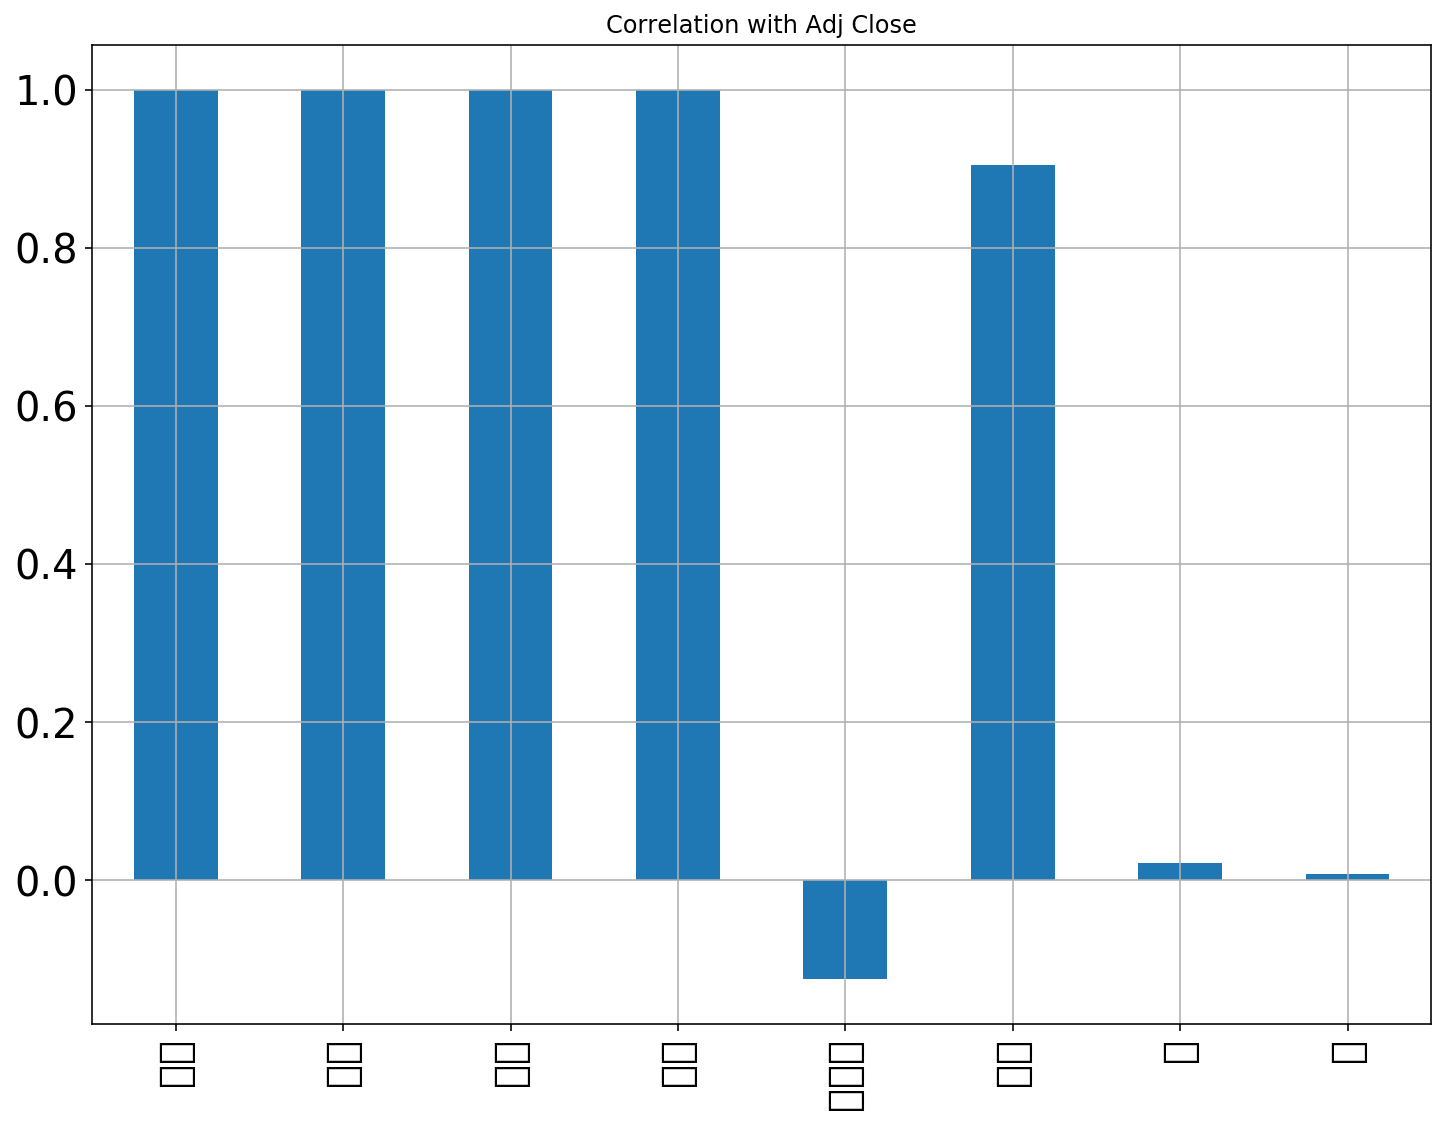

In [17]:
df.corrwith(df['종가']).plot.bar(
        figsize = (12, 9), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

In [0]:
df = df.sort_index(ascending=False).reset_index(drop=True)

In [19]:
df

,일자,시가,고가,저가,종가,거래량,연도,월,일
0,1990-01-03,673,689,661,685,1715032,1990,1,3
1,1990-01-04,689,701,685,693,2738562,1990,1,4
2,1990-01-05,689,693,678,678,1790849,1990,1,5
3,1990-01-06,685,689,681,681,1724183,1990,1,6
4,1990-01-08,681,687,673,673,966666,1990,1,8
...,...,...,...,...,...,...,...,...,...
7823,2019-12-30,56200,56600,55700,55800,8356767,2019,12,30
7824,2020-01-02,55500,56000,55000,55200,12993228,2020,1,2
7825,2020-01-03,56000,56600,54900,55500,15422255,2020,1,3
7826,2020-01-06,54900,55600,54600,55500,10278951,2020,1,6


In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
scale_cols = ['시가', '고가', '저가', '종가', '거래량']

In [0]:
df_scaled = scaler.fit_transform(df[scale_cols])

In [0]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

In [25]:
df_scaled

,시가,고가,저가,종가,거래량
0,0.004955,0.005129,0.004860,0.005138,0.005251
1,0.005236,0.005339,0.005286,0.005279,0.008384
2,0.005236,0.005199,0.005162,0.005015,0.005483
3,0.005165,0.005129,0.005215,0.005068,0.005279
4,0.005095,0.005094,0.005073,0.004927,0.002960
...,...,...,...,...,...
7823,0.977237,0.983895,0.981197,0.975012,0.025585
7824,0.964980,0.973391,0.968779,0.964454,0.039781
7825,0.973735,0.983895,0.967005,0.969733,0.047217
7826,0.954474,0.966389,0.961684,0.969733,0.031470


## train, test 사이즈 정의

In [0]:
TEST_SIZE = 200
WINDOW_SIZE = 20

In [27]:
train = df_scaled[:-TEST_SIZE]
train

,시가,고가,저가,종가,거래량
0,0.004955,0.005129,0.004860,0.005138,0.005251
1,0.005236,0.005339,0.005286,0.005279,0.008384
2,0.005236,0.005199,0.005162,0.005015,0.005483
3,0.005165,0.005129,0.005215,0.005068,0.005279
4,0.005095,0.005094,0.005073,0.004927,0.002960
...,...,...,...,...,...
7623,0.768867,0.779952,0.776311,0.778802,0.035001
7624,0.767992,0.771199,0.768329,0.764725,0.024825
7625,0.758361,0.768574,0.765668,0.764725,0.055229
7626,0.760112,0.767698,0.768329,0.770884,0.051479


In [28]:
test = df_scaled[-TEST_SIZE:]
test.head()

,시가,고가,저가,종가,거래량
7628,0.759237,0.761571,0.765668,0.765604,0.023298
7629,0.760112,0.766823,0.757685,0.768244,0.030146
7630,0.774120,0.802710,0.774537,0.799919,0.064717
7631,0.813518,0.815839,0.813563,0.812237,0.038380
7632,0.786377,0.792206,0.787842,0.793760,0.026635


In [0]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [0]:
feature_cols = ['시가', '고가', '저가', '거래량']
label_cols = ['종가']

In [0]:
train_feature = train[feature_cols]
train_label = train[label_cols]

In [0]:
train_feature, train_label = make_dataset(train_feature, train_label, 20)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

In [35]:
x_train.shape, x_valid.shape

((6086, 20, 4), (1522, 20, 4))

In [0]:
test_feature = test[feature_cols]
test_label = test[label_cols]

In [37]:
test_feature.shape, test_label.shape

((200, 4), (200, 1))

In [0]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)

In [39]:
test_feature.shape, test_label.shape

((180, 20, 4), (180, 1))

In [40]:
train_feature.shape[1], train_feature.shape[0]

(20, 7608)

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
# model.add(LSTM(16, return_sequences=False))
# model.add(Dense(16, activation='linear'))
model.add(Dense(1))

Using TensorFlow backend.


In [42]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 6086 samples, validate on 1522 samples
Epoch 1/200





6086/6086 [==============================] - 23s 4ms/step - loss: 0.0030 - val_loss: 1.0960e-04

Epoch 00001: val_loss improved from inf to 0.00011, saving model to /content/drive/My Drive/Colab Notebooks/03-stock-samsung/model/tmp_checkpoint.h5
Epoch 2/200
6086/6086 [==============================] - 13s 2ms/step - loss: 1.0708e-04 - val_loss: 1.0215e-04

Epoch 00002: val_loss improved from 0.00011 to 0.00010, saving model to /content/drive/My Drive/Colab Notebooks/03-stock-samsung/model/tmp_checkpoint.h5
Epoch 3/200
6086/6086 [==============================] - 13s 2ms/step - loss: 9.6912e-05 - val_loss: 1.1146e-04

Epoch 00003: val_loss did not improve from 0.00010
Epoch 4/200
6086/6086 [==============================] - 13s 2ms/step - loss: 9.2579e-05 - val_loss: 9.3685e-05

Epoch 00004: val_loss improved from 0.00010 to 0

In [0]:
model.load_weights(filename)

In [0]:
pred = model.predict(test_feature)

In [45]:
pred.shape

(180, 1)

## 예측 데이터 시각화

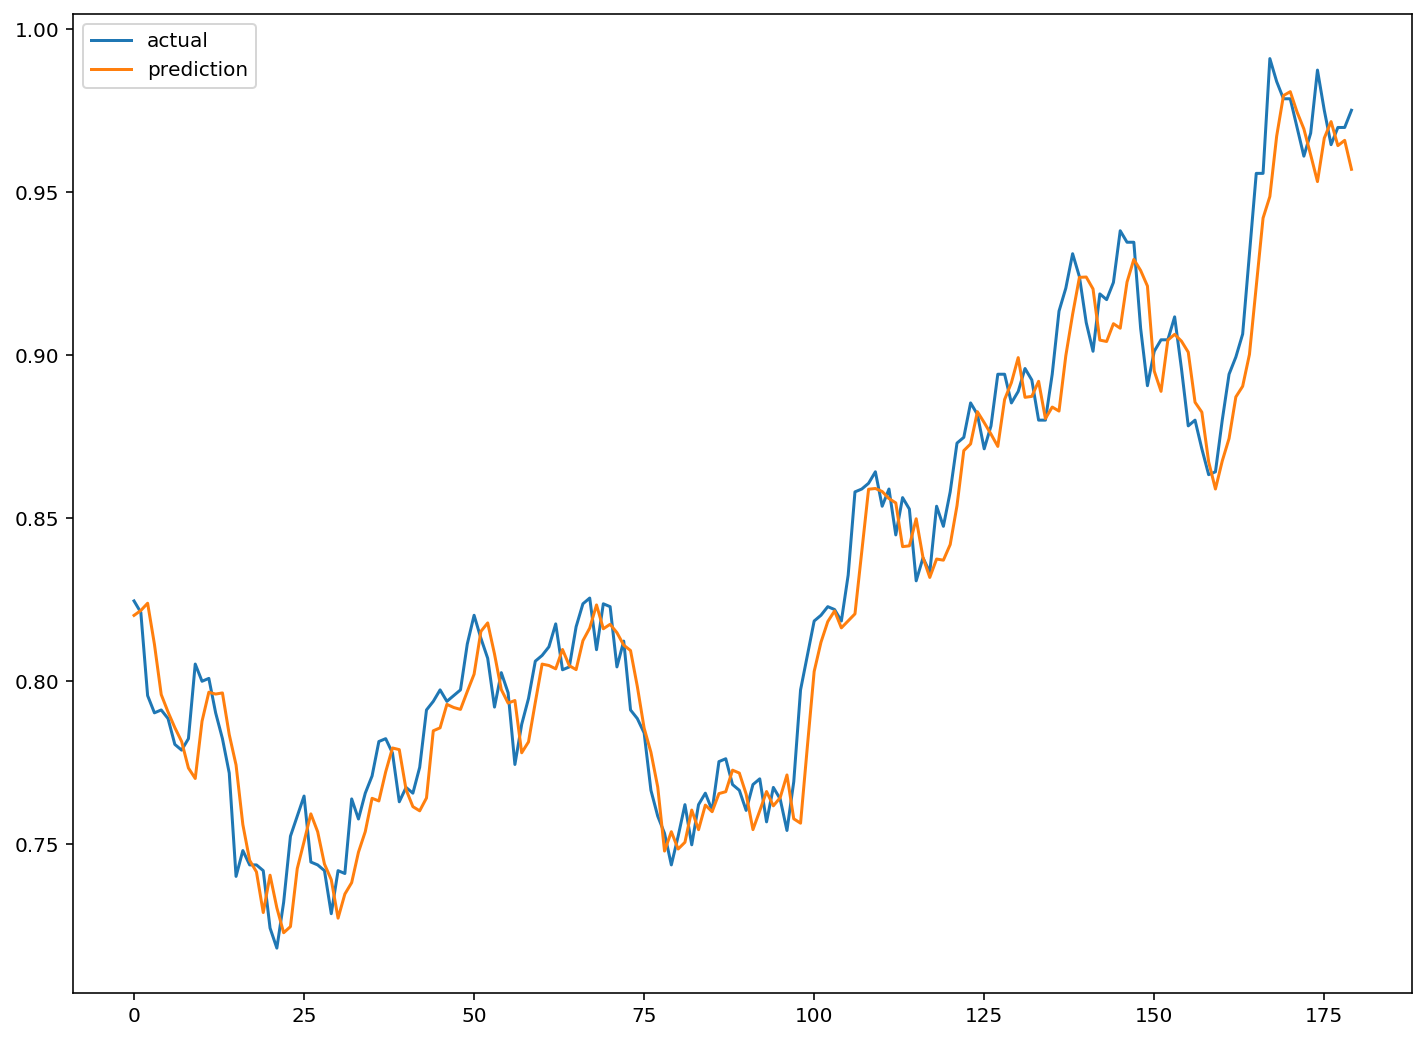

In [46]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()